# **Laboratorijska vježba 1**: Zadaci za samostalni rad
## **Podaci iz Svjetskog izvješća o sreći**

Svjetsko izvješće o sreći godišnja je publikacija Mreže rješenja za održivi razvoj Ujedinjenih naroda (engl. *United Nations Sustainable Development Solutions Network*). Sadrži članke i ljestvice nacionalne sreće na temelju ocjena vlastitog života ispitanika, koje izvješće također povezuje s različitim životnim čimbenicima.

U ovoj laboratorijskoj vježbi istražit ćemo sreću u različitim zemljama i povezana obilježja. Skupovi podataka koje ćemo koristiti dostupni su u *Data/happiness2020.csv* i *Data/countries_info.csv*.

U nastavku je dan sažetak stupaca (značajki) u skupu podataka:

**happines2020.csv**

*   country - naziv države
*   happiness_score - ocjena sreće
*   social_support - socijalna podrška (ublažavanje učinaka nejednakosti)
*   healthy_life_expectancy - očekivanji zdravi životni vijek
*   freedom_of_choices - sloboda donošenja životnih izbora
*   generosity - velikodušnost (milosrđe, volonteri)
*   perceptrion_of_corruption - percepcija korupcije
*   world_region - regija države u svijetu

**countries_info.csv**

*   country_name - naziv države
*   area - površina u kvadratnim miljama
*   population - broj stanovnika
*   literacy - postotak pismenih stanovnika




In [1]:
!head Data/countries_info.csv

country_name,area,population,literacy
afghanistan,647500,31056997,"36,0"
albania,28748,3581655,"86,5"
algeria,2381740,32930091,"70,0"
argentina,2766890,39921833,"97,1"
armenia,29800,2976372,"98,6"
australia,7686850,20264082,"100,0"
austria,83870,8192880,"98,0"
azerbaijan,86600,7961619,"97,0"
bahrain,665,698585,"89,1"


In [2]:
import pandas as pd

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## **Zadatak 1: Učitavanje podataka**

Učitajte 2 skupa podataka u Pandas DataFrame-ove (zvane *happiness* i *countries*) te prikažite prve retke. Koristite ispravnu metodu za učitavanje podataka i provjerite jesu li podaci u očekivanom formatu.

In [3]:
happiness = pd.read_csv(HAPPINESS_DATASET, sep=',')
happiness.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


In [4]:
countries = pd.read_csv(COUNTRIES_DATASET, sep=',')
countries.head()

,country_name,area,population,literacy
0,afghanistan,647500,31056997,"36,0"
1,albania,28748,3581655,"86,5"
2,algeria,2381740,32930091,"70,0"
3,argentina,2766890,39921833,"97,1"
4,armenia,29800,2976372,"98,6"


## **Zadatak 2: Spajanje podataka**

Kreirajte DataFrame pod nazivom *country_features* spajanjem prethodno stvorena 2 DataFrame-a. Redak novog DataFrame-a mora opisivati sve značajke koje imamo o nekoj državi.


In [36]:
happiness_new = happiness.rename(columns={'country':'country_name'})
happiness_new['country_name'] = happiness_new['country_name'].str.lower()

country_features = pd.merge(happiness_new,countries, how='outer')
country_features

,country_name,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,"36,0"
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,"86,5"
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,"70,0"
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,"97,1"
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,"98,6"
...,...,...,...,...,...,...,...,...,...,...,...
130,venezuela,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean,912050,25730435,"93,4"
131,vietnam,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia,329560,84402966,"90,3"
132,yemen,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa,527970,21456188,"50,2"
133,zambia,3.7594,0.698824,55.299377,0.806500,0.078037,0.801290,Sub-Saharan Africa,752614,11502010,"80,6"


## **Zadatak 3: Gdje su ljudi sretniji?**

Ispišite prvih 10 država na temelju njihove ocjene sreće (što je veća ocjena, država je sretnija).


In [16]:
happiness_countries = happiness_new.sort_values(by = "happiness_score",ascending = False).head(10)
happiness_countries

,country_name,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
38,finland,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445,Western Europe
31,denmark,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489,Western Europe
115,switzerland,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728,Western Europe
50,iceland,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710,Western Europe
92,norway,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218,Western Europe
87,netherlands,7.4489,0.939139,72.300919,0.908548,0.207612,0.364717,Western Europe
114,sweden,7.3535,0.926311,72.600769,0.939144,0.111615,0.250880,Western Europe
88,new zealand,7.2996,0.949119,73.202629,0.936217,0.191598,0.221139,North America and ANZ
6,austria,7.2942,0.928046,73.002502,0.899989,0.085429,0.499955,Western Europe
72,luxembourg,7.2375,0.906912,72.599998,0.905636,-0.004621,0.367084,Western Europe


Zanima nas u kojoj su regiji svijeta ljudi sretniji.

Izradite i ispišite DataFrame s:
1.   Prosječnom ocjenom sreće
2.   Brojem zemalja za svaku svjetsku regiju.

Poredajte rezultat da biste prikazali rangiranje sreće.

In [7]:
happiness_regions_grouped = happiness_new.groupby(happiness_new.world_region)
happiness_ranked_mean = happiness_regions_grouped['happiness_score'].agg('mean')
happiness_ranked_count = happiness_regions_grouped.agg('count')

happiness_ranked_mean

world_region
Central and Eastern Europe            5.891393
Commonwealth of Independent States    5.358342
East Asia                             5.483633
Latin America and Caribbean           5.971280
Middle East and North Africa          5.269306
North America and ANZ                 7.173525
South Asia                            4.355083
Southeast Asia                        5.517788
Sub-Saharan Africa                    4.393856
Western Europe                        6.967405
Name: happiness_score, dtype: float64

In [8]:
happiness_ranked_count['country_name']

world_region
Central and Eastern Europe            14
Commonwealth of Independent States    12
East Asia                              3
Latin America and Caribbean           20
Middle East and North Africa          16
North America and ANZ                  4
South Asia                             6
Southeast Asia                         8
Sub-Saharan Africa                    32
Western Europe                        20
Name: country_name, dtype: int64

Najbolje rangirana regija ima samo nekoliko država! Koje su to i koji je njihov rezultat sreće?

In [96]:
happiest_countries = country_features.query("world_region == 'Western Europe'")[['country_name','happiness_score']]
happiest_countries


,country_name,happiness_score
6,austria,7.2942
11,belgium,6.8635
29,cyprus,6.1590
31,denmark,7.6456
38,finland,7.8087
39,france,6.6638
42,germany,7.0758
44,greece,5.5150
50,iceland,7.5045
55,ireland,7.0937


## **Zadatak 4: Koliko je svijet pismen?**

Ispišite nazive država s razinom pismenosti od 100%.

Za svaku zemlju ispište naziv i regiju svijeta u formatu: {ime regije}-{ime zemlje} ({ocjena sreće}).


In [20]:
countries_l=country_features.query('literacy=="100,0"')[['world_region','country_name','happiness_score']]
countries_l

,world_region,country_name,happiness_score
5,North America and ANZ,australia,7.2228
31,Western Europe,denmark,7.6456
38,Western Europe,finland,7.8087
72,Western Europe,luxembourg,7.2375
92,Western Europe,norway,7.4880


Koliki je globalni prosjek razine pismenosti?

In [63]:
global_literacy = country_features['literacy'].str.replace(',','.').astype(float).mean()
global_literacy

81.85112781954888

Izračunajte udio zemalja s razinom pismenosti ispod 50%. Ispišite vrijednost u postotcima, formatiranu s 2 decimale.

In [54]:
literacy_data = country_features.copy()
literacy_data['literacy'] = literacy_data['literacy'].str.replace(',','.').astype(float)
literacy_less_than_50 = literacy_data.query("literacy < 50.0")
number_of_countries = len(literacy_less_than_50)
'%.2f'%((number_of_countries / len(literacy_data))*100)


'11.85'

Ispišite neobrađeni broj i postotak nepismenog svjetskog stanovništva.

In [70]:
population = literacy_data['population'].sum()
literate = population * (global_literacy/100)
iliterate = population - literate
percentage_iliterated = '%.2f'%(iliterate/population)
[iliterate,percentage_iliterated]

[1115334420.9619398, '0.18']

## **Zadatak 5: Gustoća naseljenosti**

Dodajte DataFrame-u *country_features* novi stupac zvan *population_density* koji se dobije dijeljenjem stupca *population* sa stupcem *area*.

In [72]:
country_features['population_density'] = country_features['population']/country_features['area']
country_features

,country_name,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy,population_density
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,"36,0",47.964474
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,"86,5",124.587971
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,"70,0",13.826065
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,"97,1",14.428413
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,"98,6",99.878255
...,...,...,...,...,...,...,...,...,...,...,...,...
130,venezuela,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean,912050,25730435,"93,4",28.211650
131,vietnam,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia,329560,84402966,"90,3",256.108041
132,yemen,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa,527970,21456188,"50,2",40.639029
133,zambia,3.7594,0.698824,55.299377,0.806500,0.078037,0.801290,Sub-Saharan Africa,752614,11502010,"80,6",15.282748


Koji je rezultat sreće za 3 države s najnižom gustoćom naseljenosti?

In [75]:
happiness_3 = country_features.sort_values(by = "population_density",ascending = False).head(3)[['country_name','happiness_score']]
happiness_3

,country_name,happiness_score
107,singapore,6.3771
78,malta,6.7728
8,bahrain,6.2273


## **Zadatak 6: Zdravi i sretni?**

Iscrtajte na raspršeni dijagram (engl. *scatter plot*) ocjenu sreće (x os) i očekivano trajanje zdravog života (y os).

<AxesSubplot:xlabel='happiness_score', ylabel='healthy_life_expectancy'>

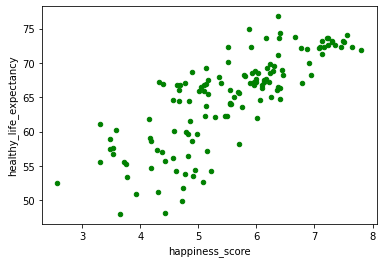

In [81]:
country_features.plot.scatter(x='happiness_score',y='healthy_life_expectancy', color='g')